In [86]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import math

# Curve smoothing

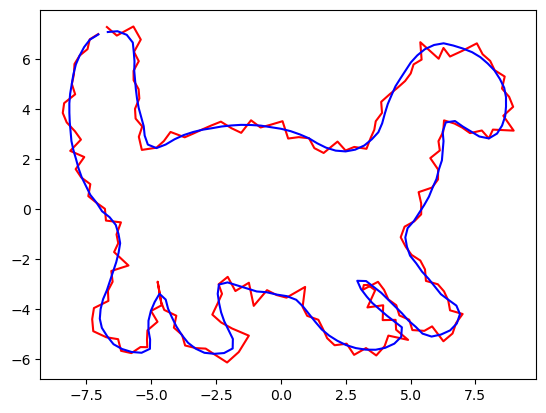

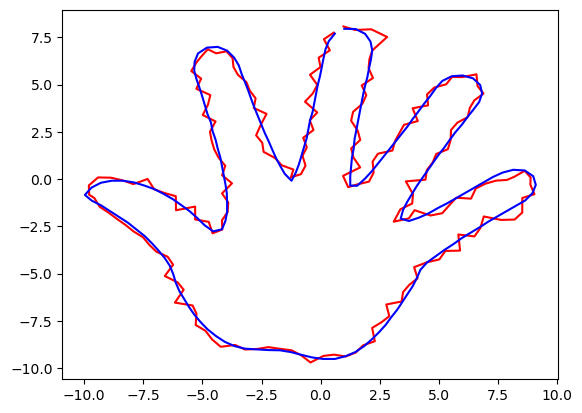

In [87]:
# Open the txt files with the coordinates of the points in the curve (numpy.loadtxt)
dir = 'data/curves/'
dino_noisy = np.loadtxt(dir + 'dino_noisy.txt')
dino = np.loadtxt(dir + 'dino.txt')
hand_noisy = np.loadtxt(dir + 'hand_noisy.txt')
hand = np.loadtxt(dir + 'hand.txt')

# Plot the noisy and clean curves
plt.plot(dino_noisy[:,0], dino_noisy[:,1], 'r')
plt.plot(dino[:,0], dino[:,1], 'b')
plt.show()

plt.plot(hand_noisy[:,0], hand_noisy[:,1], 'r')
plt.plot(hand[:,0], hand[:,1], 'b')
plt.show()


# First implementation of curve smoothing

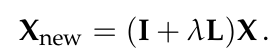

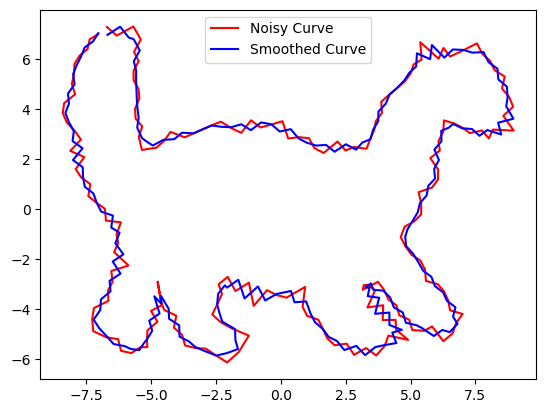

In [88]:
# Kernel
lamb = 0.5

# Dimensions of the text files
N = len(dino_noisy)

# Create the matrix L
from numpy import eye
# Diagonal matrix of size N x N with the diagonal elements equal to 2
L = eye(N, N) * -2
# Add 1 to the elements in the diagonal above and below the main diagonal
L = L + eye(N, N, 1) + eye(N, N, -1)
# Add 1 in the first row of the last column and the last row of the first column
L[0, N-1] = 1
L[N-1, 0] = 1

# Apply the equation to find the curve
dino_smooth = (eye(N, N) + lamb * L) @ dino_noisy

plt.plot(dino_noisy[:,0], dino_noisy[:,1], 'r', label='Noisy Curve')
plt.plot(dino_smooth[:,0], dino_smooth[:,1], 'b', label='Smoothed Curve')
plt.legend()
plt.show()


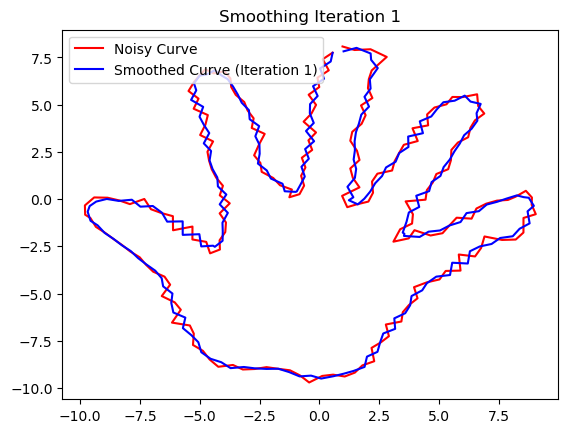

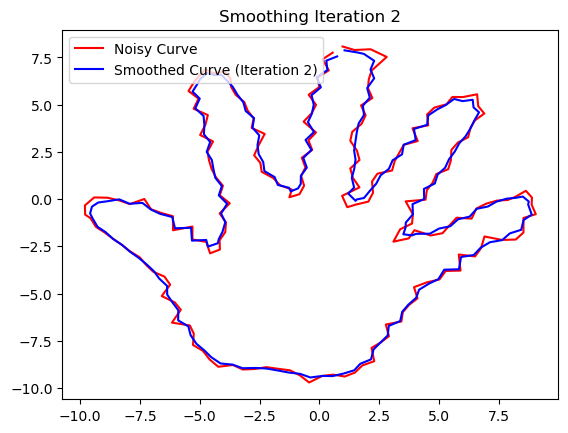

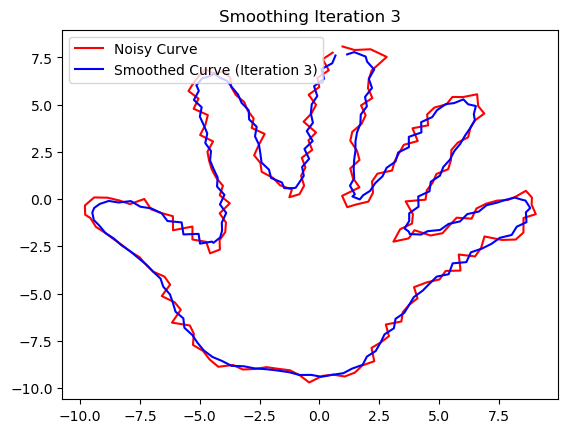

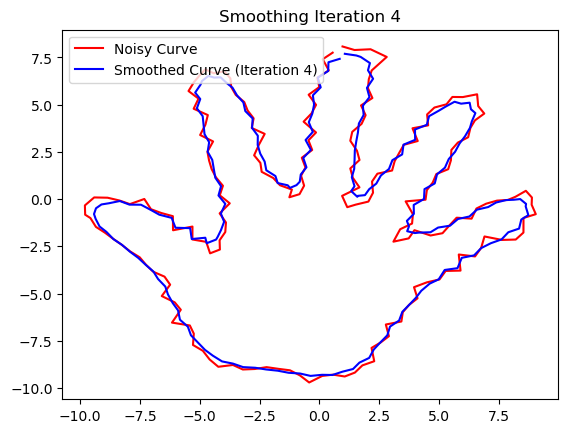

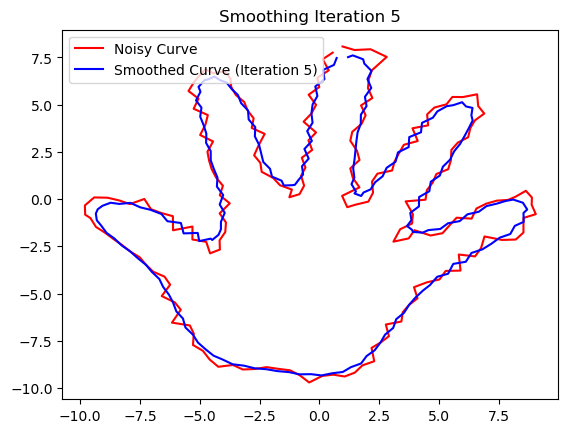

In [89]:
# Create a function to apply the equation to find the curve
def smooth_curve(noisy_curve, lamb):
    N = len(noisy_curve)
    L = eye(N, N) * -2
    L = L + eye(N, N, 1) + eye(N, N, -1)
    L[0, N-1] = 1
    L[N-1, 0] = 1
    return (eye(N, N) + lamb * L) @ noisy_curve

# Now I will apply the function to the hand curve several times
hand_smooth = hand_noisy
for i in range(5):
    hand_smooth = smooth_curve(hand_smooth, lamb)
    plt.plot(hand_noisy[:,0], hand_noisy[:,1], 'r', label='Noisy Curve')
    plt.plot(hand_smooth[:,0], hand_smooth[:,1], 'b', label=f'Smoothed Curve (Iteration {i+1})')
    plt.title(f'Smoothing Iteration {i+1}')
    plt.legend()
    plt.show()


# Implicit smoothing
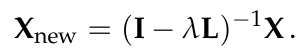

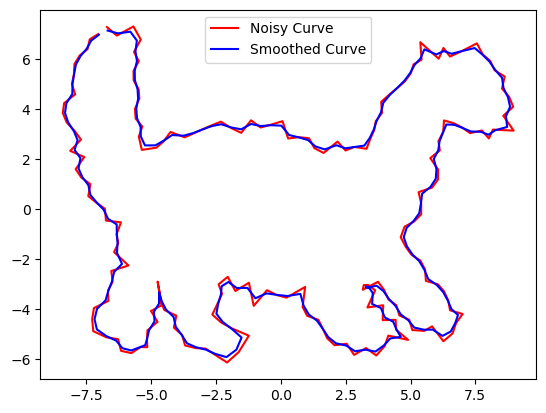

In [90]:
# Implicit smoothing
# Kernel
lamb = 0.5

# Dimensions of the text files
N = len(dino_noisy)

# Create the matrix L
from numpy import eye
# Diagonal matrix of size N x N with the diagonal elements equal to 2
L = eye(N, N) * -2
# Add 1 to the elements in the diagonal above and below the main diagonal
L = L + eye(N, N, 1) + eye(N, N, -1)
# Add 1 in the first row of the last column and the last row of the first column
L[0, N-1] = 1
L[N-1, 0] = 1

# Apply the equation to find the curve
dino_smooth_im = np.linalg.inv((eye(N, N) - lamb * L)) @ dino_noisy

plt.plot(dino_noisy[:,0], dino_noisy[:,1], 'r', label='Noisy Curve')
plt.plot(dino_smooth_im[:,0], dino_smooth_im[:,1], 'b', label='Smoothed Curve')
plt.legend()
plt.show()

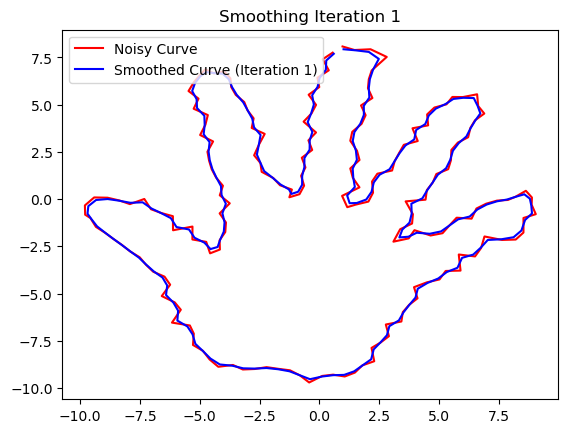

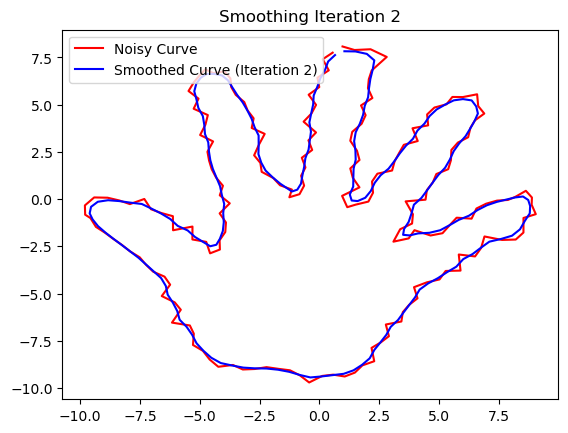

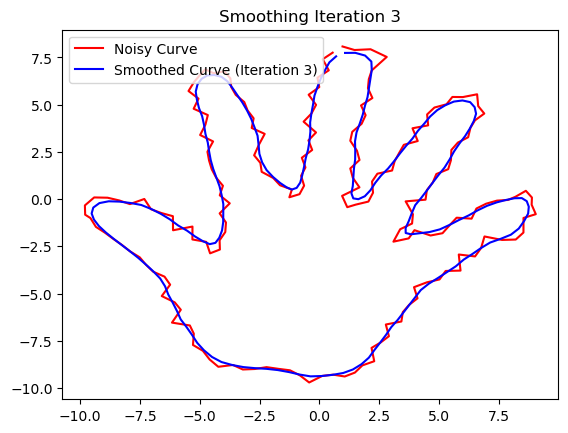

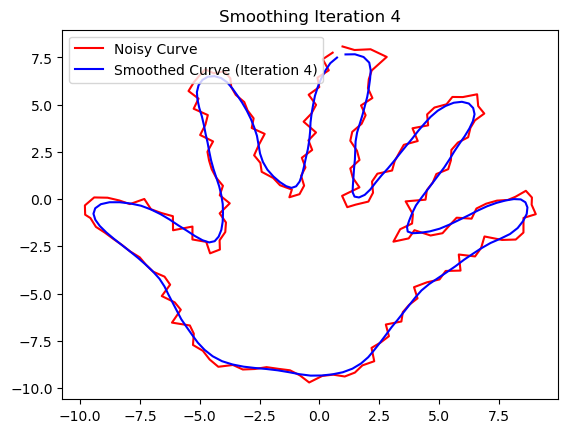

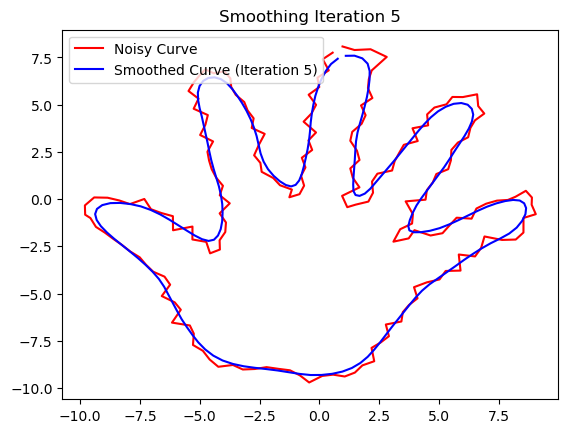

In [91]:
# Create a function for the implicit smoothing
def smooth_curve_implicit(noisy_curve, lamb):
    N = len(noisy_curve)
    L = eye(N, N) * -2
    L = L + eye(N, N, 1) + eye(N, N, -1)
    L[0, N-1] = 1
    L[N-1, 0] = 1
    return np.linalg.inv((eye(N, N) - lamb * L)) @ noisy_curve

# Now I will apply the function to the hand curve several times
hand_smooth_im = hand_noisy
for i in range(5):
    hand_smooth_im = smooth_curve_implicit(hand_smooth_im, lamb)
    plt.plot(hand_noisy[:,0], hand_noisy[:,1], 'r', label='Noisy Curve')
    plt.plot(hand_smooth_im[:,0], hand_smooth_im[:,1], 'b', label=f'Smoothed Curve (Iteration {i+1})')
    plt.title(f'Smoothing Iteration {i+1}')
    plt.legend()
    plt.show()

# More complex smoothing

In [92]:
import numpy as np

def create_custom_matrix_with_corners(n, values):
    """
    Creates an NxN matrix with specified values for the main diagonal, the diagonals on both sides,
    and sets the value of 1 for the first row of the last columns and the last row of the first columns.
    
    Parameters:
    - n: The size of the matrix (NxN).
    - values: A list where the first value is for the main diagonal, the second value is for the diagonals
              immediately next to the main diagonal (both above and below), and so on.
    
    Returns:
    - An NxN numpy array with the specified diagonal values and corner adjustments.
    """
    if len(values) > n:
        raise ValueError("Too many values specified for the size of the matrix.")
    
    matrix = np.zeros((n, n))
    
    # Set the main diagonal
    np.fill_diagonal(matrix, values[0])
    
    # Set the diagonals above and below the main diagonal
    for offset, value in enumerate(values[1:], start=1):
        np.fill_diagonal(matrix[offset:], value)  # Diagonals above the main diagonal
        np.fill_diagonal(matrix[:, offset:], value)  # Diagonals below the main diagonal
    
    # Set the value of 1 for the specified corners
    matrix[0, -1] = 1  # First row of the last column
    matrix[-1, 0] = 1  # Last row of the first column
    
    return matrix


In [95]:
A_values = [-2, 1]  # Values for the main diagonal and the two sets of off-diagonals
A = create_custom_matrix_with_corners(N, A_values)
print(A)

B_values = [-6, 4, -1]
B = create_custom_matrix_with_corners(N, B_values)
print(B)




[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]
[[-6.  4. -1. ...  0.  0.  1.]
 [ 4. -6.  4. ...  0.  0.  0.]
 [-1.  4. -6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -6.  4. -1.]
 [ 0.  0.  0. ...  4. -6.  4.]
 [ 1.  0.  0. ... -1.  4. -6.]]
